<a href="https://colab.research.google.com/github/mcatrinque/area_cep_mg/blob/main/br_mg_ceps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Representação Geométrica das Áreas de CEP do Estado de Minas Gerais

##Adicionando Bibliotecas

In [20]:
!pip install geopandas
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyproj
import missingno as msno
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Importando Base de Dados

Carregando tabelas com os registros de unidades residenciais e comerciais referentes a Belo Horizonte e Minas Gerais

In [21]:
path = '/content/'
!gdown "1ggh_PcHpAYUz-z1GNlKUG1SYKWS5OKh5"
!gdown "1PNr1UECAIGAbuRA9hn3BYwiSy3WHIa5p"

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1ggh_PcHpAYUz-z1GNlKUG1SYKWS5OKh5 

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1PNr1UECAIGAbuRA9hn3BYwiSy3WHIa5p 



### Unidades Residenciais e Comerciais - Minas Gerais

In [22]:
unidades_mg = pd.read_csv('unidades', sep=';', )
unidades_mg.drop('unit', axis=1, inplace=True)
unidades_mg.drop('district', axis=1, inplace=True)
unidades_mg.drop('id', axis=1, inplace=True)
unidades_mg.head()

,cod_unidade,distancia,ogc_fid,hash,number,street,city,region,postcode,wkb_geometry
0,1,0.132457,1,241967d28ddd6943,375,AVENIDA JOSE ESTEVES BORGES,Abadia dos Dourados,MG,38540-000,010100002042120000FA83DCA051B347C04EB6813B507D...
1,2,0.132457,2,fdb87216b827362d,241,AVENIDA JOSE ESTEVES BORGES,Abadia dos Dourados,MG,38540-000,010100002042120000FA83DCA051B347C04EB6813B507D...
2,3,0.132457,3,b00de4ecf671ccb2,225,AVENIDA JOSE ESTEVES BORGES,Abadia dos Dourados,MG,38540-000,010100002042120000FA83DCA051B347C04EB6813B507D...
3,4,0.132457,4,ea24966be48ddaf1,219,AVENIDA JOSE ESTEVES BORGES,Abadia dos Dourados,MG,38540-000,010100002042120000FA83DCA051B347C04EB6813B507D...
4,6,0.134399,6,bdc9aa2327a071ca,20,RUA JOSE TOMAZ DA CUNHA,Abadia dos Dourados,MG,38540-000,010100002042120000F9A46EC218B347C0D9092FC1A97D...


In [23]:
conta = unidades_mg.groupby('postcode').count()
conta.head()

,cod_unidade,distancia,ogc_fid,hash,number,street,city,region,wkb_geometry
postcode,,,,,,,,,
30107-970,74,74,74,74,74,74,74,74,74
30110-005,325,325,325,325,325,325,325,325,325
30110-009,141,141,141,141,141,141,141,141,141
30110-012,24,24,24,24,24,24,24,24,24
30110-013,36,36,36,36,36,36,36,36,36


### Unidades Residenciais e Comerciais - Belo Horizonte

In [24]:
unidades_bh = pd.read_csv('unidades_bh', sep=';')
unidades_bh.head()

,street,number,unit,postcode,hash,ogc_fid,distancia,wkb_geometry
0,AVENIDA AFONSO PENA,3031,APARTAMENTO 51,30130-008,aed2de0f4bb1b626,533112,0.004529,0101000020421200004628B682A6F645C05E8C37E801F0...
1,AVENIDA AFONSO PENA,3031,APARTAMENTO 52,30130-008,29eaf1ffa950d168,533113,0.004529,0101000020421200004628B682A6F645C05E8C37E801F0...
2,AVENIDA AFONSO PENA,3031,APARTAMENTO 41,30130-008,b8c4078e882931ed,533114,0.004529,0101000020421200004628B682A6F645C05E8C37E801F0...
3,AVENIDA AFONSO PENA,3031,APARTAMENTO 42,30130-008,9d0fc28ad8dd4f1e,533115,0.004529,0101000020421200004628B682A6F645C05E8C37E801F0...
4,AVENIDA AFONSO PENA,3031,APARTAMENTO 31,30130-008,2a0d2e9888b185e2,533116,0.004529,0101000020421200004628B682A6F645C05E8C37E801F0...


## Análises e Observações das Bases de Dados

### Análise da base de dados de Minas Gerais

Verificando os Tipos de dados da base

In [25]:
unidades_mg.dtypes

cod_unidade       int64
distancia       float64
ogc_fid           int64
hash             object
number           object
street           object
city             object
region           object
postcode         object
wkb_geometry     object
dtype: object

Avaliando atributos de acordo com a quantidade de registros vazios 

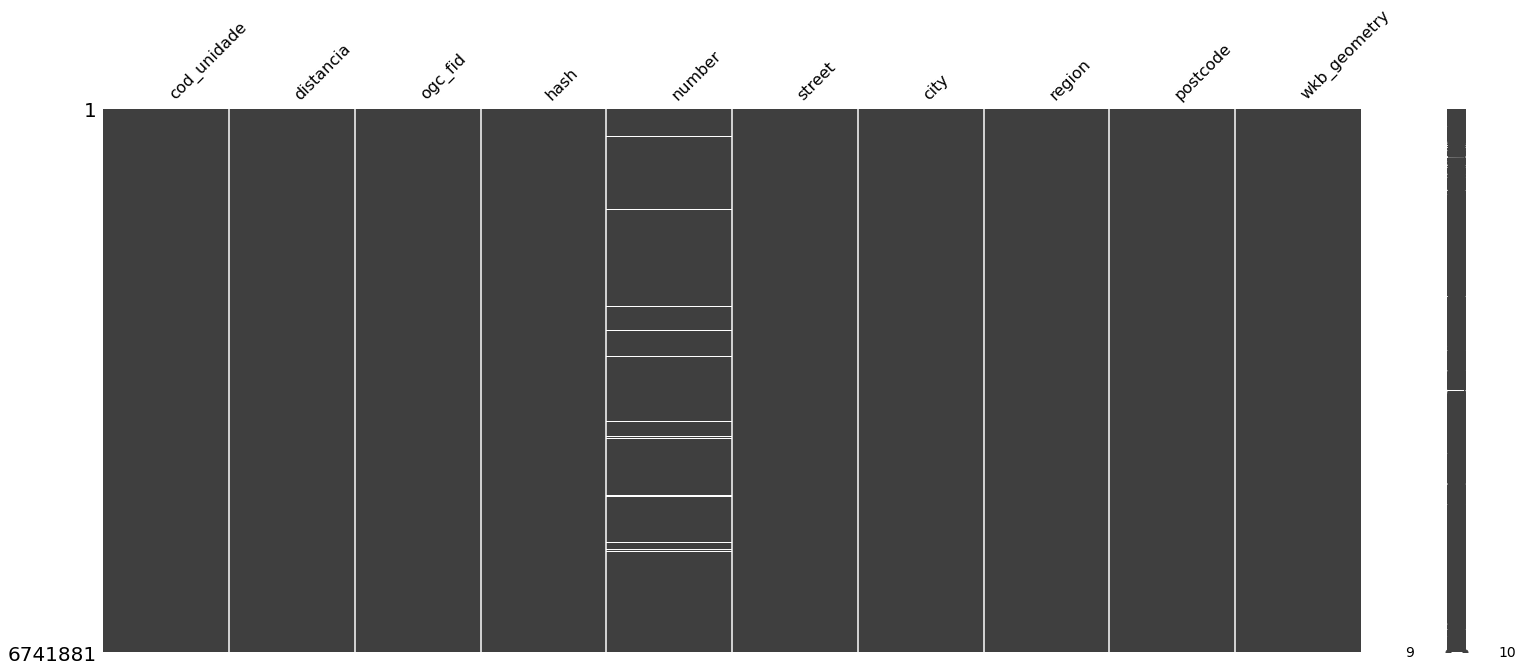

In [26]:
msno.matrix(unidades_mg)

### Análise da base de dados de Belo Horizonte

Verificando os Tipos de dados da base

In [27]:
unidades_bh.dtypes

street           object
number           object
unit             object
postcode         object
hash             object
ogc_fid           int64
distancia       float64
wkb_geometry     object
dtype: object

Avaliando atributos de acordo com a quantidade de registros vazios 

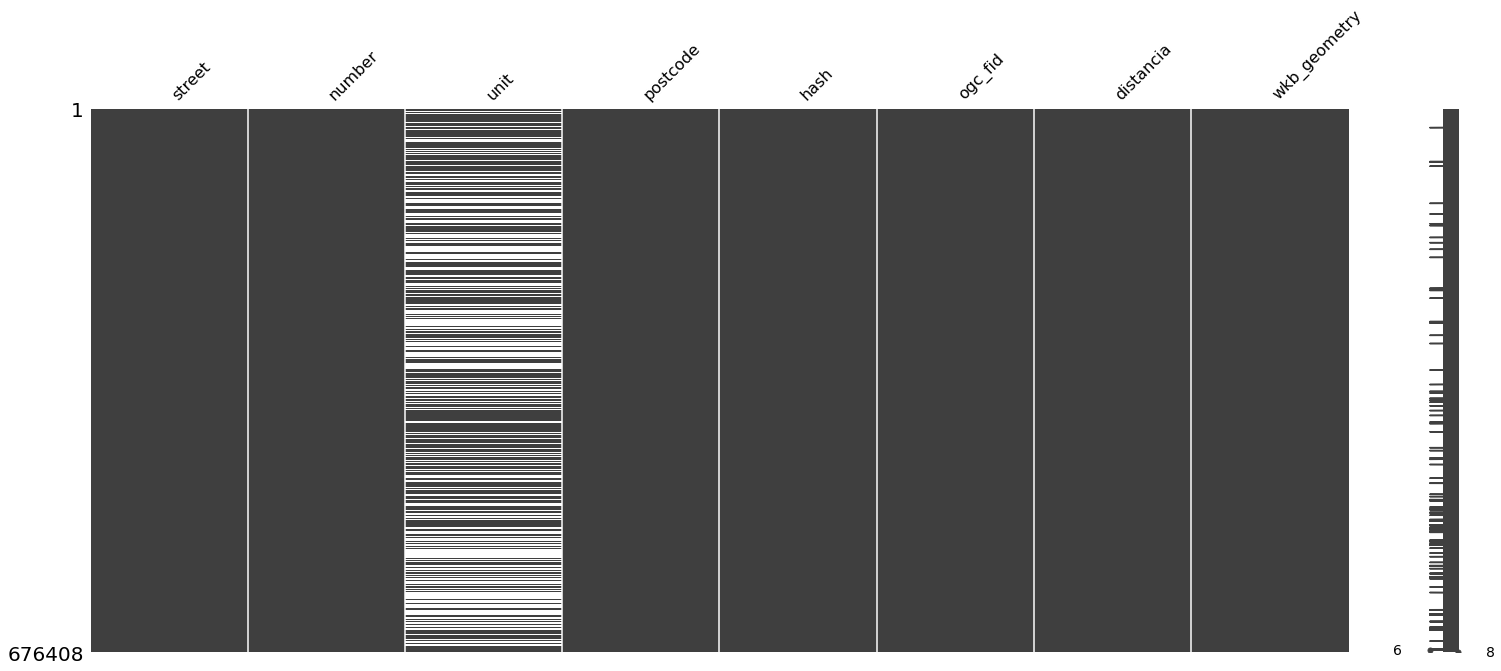

In [28]:
msno.matrix(unidades_bh)

##Definições de Área Extraídas das Bases Anteriores

######Representação das Áreas de CEP - Minas Gerais

In [29]:
!gdown "1wzhm433XVQjMNXfykrIVx1SRvgJKIzEd"
!gdown "1YXx2oIixYeMZoeOiE8CXCwXUjiHrIJOb"
!gdown "1NxNR_yQ7IdzUnPq4Whkr8O-nhmiDuA1-"
!gdown "1nrnyH7o1MA7FTbKetIY8qgPDz_etZrXE"

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1wzhm433XVQjMNXfykrIVx1SRvgJKIzEd 

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1YXx2oIixYeMZoeOiE8CXCwXUjiHrIJOb 

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1NxNR_yQ7IdzUnPq4Whkr8O-nhmiDuA1- 

Access denied with the following error:

 	Cannot retrieve the p

###Limites dos Municipios MG

In [30]:
!gdown "10etKZd9KUV47m_wm9EnqsFGXLp0Lc2dv"
!gdown "1WExkYI1i6JrUw_sMkx2hGqzNwgz5wdsL"
!gdown "1O1Gja2X7CcbUQeuMp3Qa3yVlgRVXoD9O"
!gdown "18Do2b9uuY3MON8Z7ace_wF0erEIB7kUH"

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=10etKZd9KUV47m_wm9EnqsFGXLp0Lc2dv 

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1WExkYI1i6JrUw_sMkx2hGqzNwgz5wdsL 

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1O1Gja2X7CcbUQeuMp3Qa3yVlgRVXoD9O 

Access denied with the following error:

 	Cannot retrieve the p

###Representação das Áreas de CEP - Belo Horizonte

In [31]:
!gdown "1aqnDkgEKC45QmovK0Hk1costnSYSuPsS"
!gdown "1C1iKbh06HTI8sLcYxBgjuwmoohtTfiFe"
!gdown "1WP-myPEeiCz6-tTaViMpXEafW4txIs0X"
!gdown "1pr3eUz86nt_0ysECgxBDqXjR8u-jrrbp"

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1aqnDkgEKC45QmovK0Hk1costnSYSuPsS 

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1C1iKbh06HTI8sLcYxBgjuwmoohtTfiFe 

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1WP-myPEeiCz6-tTaViMpXEafW4txIs0X 

Access denied with the following error:

 	Cannot retrieve the p

###Limites Regionais Belo Horizonte

In [32]:
!gdown "1F2-9jbpOPKttjh552O769EzMsqD7P1Ve"
!gdown "1km-XOlaonfsGmmkZqoyTCxgmW-ToqlgL"
!gdown "1splo5MNUf1vltEOESZOoi3CO1rdfu-sH"
!gdown "1sr1VLaEcbJ3OO-KNW2JeGXqwGWJ6bcE0"

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1F2-9jbpOPKttjh552O769EzMsqD7P1Ve 

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1km-XOlaonfsGmmkZqoyTCxgmW-ToqlgL 

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1splo5MNUf1vltEOESZOoi3CO1rdfu-sH 

Access denied with the following error:

 	Cannot retrieve the p

## Coleta e Tratamento de Dados
O shapefile foi gerado a partir do agrupamento de unidades, residenciais e comerciais, em função do cep e da distância dos pontos de cada *cluster* para o seu centróide, e da junção com os CEPs cuja a área corresponde ao território do municpios. Os pontos georeferenciados do estado de Minas Gerais, foram obtidos em [OpenAddresses](https://batch.openaddresses.io/data) e os seus limites territoriais coletados de [Portal de Mapas - IBGE](https://portaldemapas.ibge.gov.br/portal.php). Já as referências de residências e comércios da capital mineira, foram coletadas do sistema [BHMAP - PBH](http://bhmap.pbh.gov.br/v2/mapa/idebhgeo), fornecido pela Prefeitura de Belo Horizonte. A partir dos pontos fornecidos pela base e tratados pelo processo descrito, foi possível estimar um envoltório convexo que determina-se os limites de área dos CEPs que não eram equivalente a área do município.

###Dados Relacionados as Áreas de CEP - Minas Gerais

In [33]:
# project GeoPandas dataframe
mg_area_cep = gpd.read_file(path + 'br_mg_poligonos_ceps.shp')
mg_area_cep.drop('id', axis=1, inplace=True)
mg_area_cep.to_crs(pyproj.CRS.from_epsg(4674), inplace=True)
mg_area_cep.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


,postcode,geometry,coordenates
0,31744-134,"POLYGON ((-43.94817 -19.82529, -43.94838 -19.8...",POINT (-43.94821 -19.82444)
1,31748-550,"POLYGON ((-43.92594 -19.80153, -43.92602 -19.8...",POINT (-43.92590 -19.80135)
2,30860-280,"POLYGON ((-44.00601 -19.91061, -44.00584 -19.9...",POINT (-44.00590 -19.91030)
3,30260-090,"POLYGON ((-43.91679 -19.92123, -43.91687 -19.9...",POINT (-43.91665 -19.92095)
4,31130-230,"POLYGON ((-43.94960 -19.88662, -43.94983 -19.8...",POINT (-43.94937 -19.88636)


In [34]:
lim_municipal = gpd.read_file(path + 'br_mg_limites_municipios.shp')
lim_municipal.rename(columns={'NOME':'CIDADE'}, inplace=True)
lim_municipal.drop('ANODEREFER', axis=1, inplace=True)
lim_municipal.drop('LEICRIACAO', axis=1, inplace=True)
lim_municipal.head()

,CIDADE,GEOCODIGO,AREA,geometry
0,Munhoz,3143807,190.72,"LINESTRING (-46.40541 -22.61895, -46.40555 -22..."
1,Contagem,3118601,194.38,"LINESTRING (-44.02628 -19.90228, -44.02629 -19..."
2,Belo Horizonte,3106200,330.23,"LINESTRING (-43.95019 -19.98793, -43.95019 -19..."
3,Confins,3117876,41.67,"LINESTRING (-43.94228 -19.65750, -43.94232 -19..."
4,Lagoa Santa,3137601,229.45,"LINESTRING (-43.96842 -19.59981, -43.96862 -19..."


###Dados Relacionados as Áreas de CEP - Belo Horizonte

In [35]:
# project GeoPandas dataframe
bh_area_cep = gpd.read_file(path + 'br_mg_bh_poligonos_ceps.shp')
bh_area_cep.to_crs(pyproj.CRS.from_epsg(4674), inplace=True)
bh_area_cep.head()

,id,cep,geometry
0,0,31744-134,"POLYGON ((-43.94817 -19.82529, -43.94838 -19.8..."
1,1,31748-550,"POLYGON ((-43.92594 -19.80153, -43.92602 -19.8..."
2,2,30860-280,"POLYGON ((-44.00601 -19.91061, -44.00584 -19.9..."
3,3,30260-090,"POLYGON ((-43.91679 -19.92123, -43.91687 -19.9..."
4,4,31130-230,"POLYGON ((-43.94960 -19.88662, -43.94983 -19.8..."


In [36]:
lim_regional = gpd.read_file(path + 'br_mg_bh_limites_regionais.shp')
lim_regional.rename(columns={'AREA_KM2':'AREA'}, inplace=True)
lim_regional.rename(columns={'NOME':'REGIAO'}, inplace=True)
lim_regional.drop('ID_LM', axis=1, inplace=True)
lim_regional.drop('PERIMETR_M', axis=1, inplace=True)
lim_regional.head()

,AREA,geometry
0,330.23,"POLYGON ((609866.632 7789584.944, 609865.420 7..."


## Resultados e Visualização das Áreas Geradas
O que se pode observar depois das operações de tratamento e manipulação dos dados coletados, resultou em um arquivo, no formato shapefile, disponível no [Google Drive](https://drive.google.com/drive/folders/1GLgAKU3Ejle7BIYV8CYyG_siGLirDMgB?usp=sharing). Em relação aos polígonos gerados para a representação de área dos CEPs, é possível identificar os seguintes fenômenos:
*   A forma dos polígono em cidades com apenas um cep, pode ser definida pelos limites territoriais do município;
*   Cidades com alta concentração de CEPs, tendem a gerar geometrias disformes;
*   O formato dos CEPs nos grandes centros urbanos, tende a se aproximar do traçado de suas ruas.

Abaixo, seguem as visualizações que corroboram as inferências citadas:

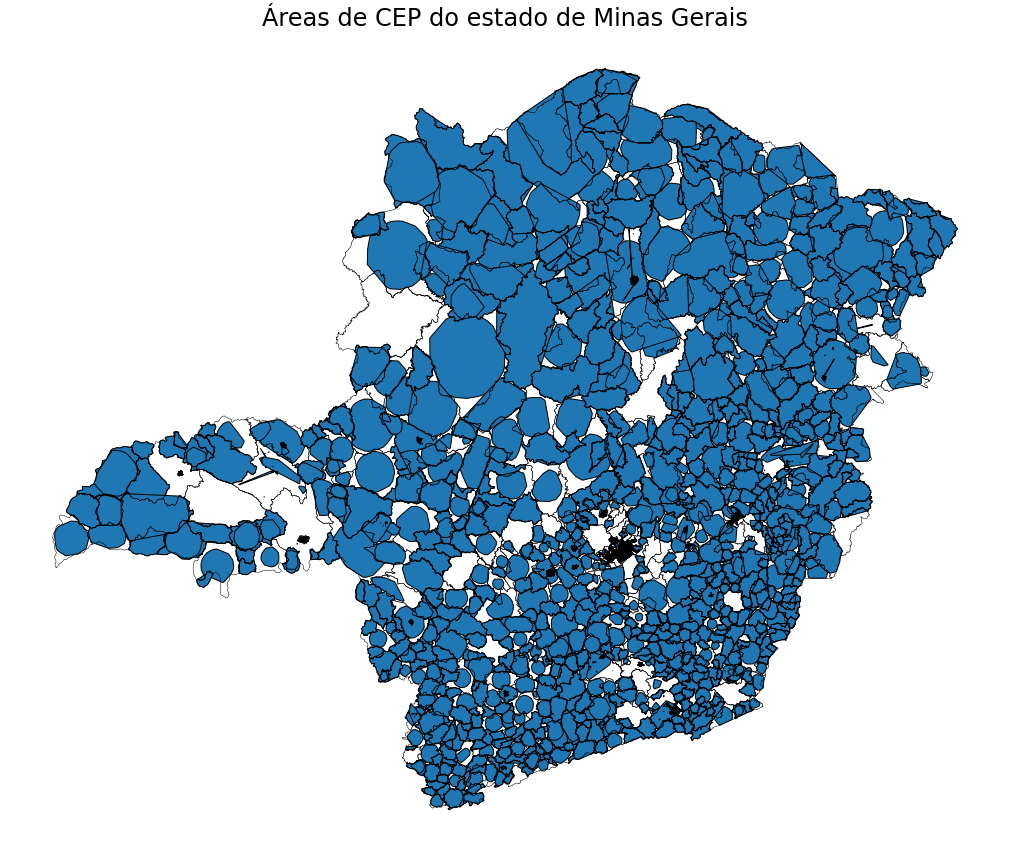

In [37]:
fig, gax = plt.subplots(figsize = (20,15))
plt.title("Áreas de CEP do estado de Minas Gerais", fontsize=24)
lim_municipal.plot(ax=gax,
                   edgecolor='black',
                   linewidth=0.5)
mg_area_cep.plot(ax=gax,
                   edgecolor='black',
                   linewidth=1)
plt.axis('off')
plt.show()

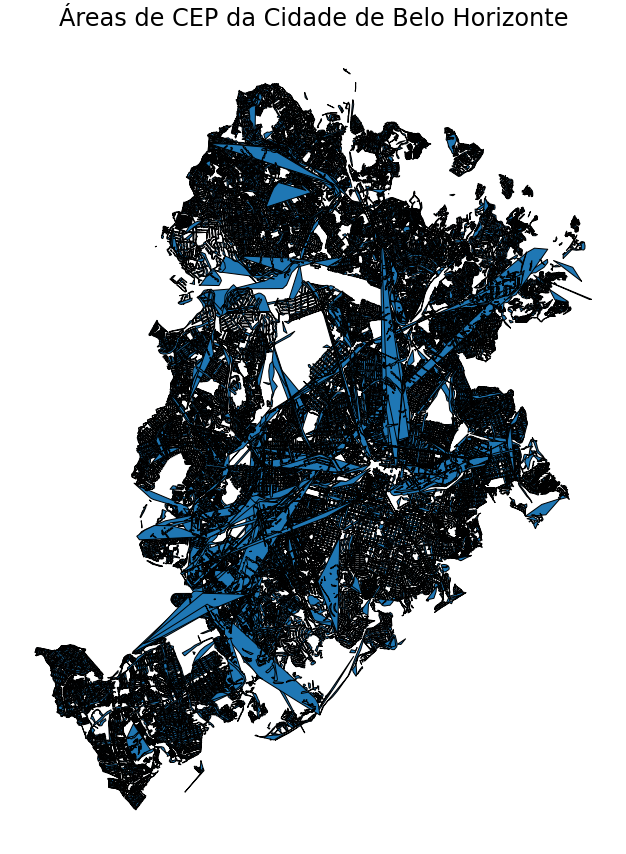

In [38]:
fig, gax = plt.subplots(figsize = (20,15))
plt.title("Áreas de CEP da Cidade de Belo Horizonte", fontsize=24)
bh_area_cep.plot(ax=gax,
                   edgecolor='black',
                   linewidth=1)
plt.axis('off')
plt.show()